In [1]:
import seaborn as sns

In [5]:
propinas = sns.load_dataset("tips")
propinas.sample(5)

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
27,12.69,2.00,Male,No,Sat,Dinner,2
165,24.52,3.48,Male,No,Sun,Dinner,3
28,21.70,4.30,Male,No,Sat,Dinner,2
20,17.92,4.08,Male,No,Sat,Dinner,2


In [6]:
nombre_columnas = ['total','propina','sexo','fumador','dia','turno','num_personas']
propinas.columns = nombre_columnas
propinas.head()

,total,propina,sexo,fumador,dia,turno,num_personas
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
propinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   total         244 non-null    float64 
 1   propina       244 non-null    float64 
 2   sexo          244 non-null    category
 3   fumador       244 non-null    category
 4   dia           244 non-null    category
 5   turno         244 non-null    category
 6   num_personas  244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
propinas.describe()

,total,propina,num_personas
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:xlabel='dia', ylabel='total'>

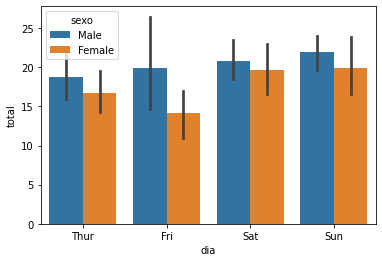

In [14]:
sns.barplot(x='dia',y='total',data=propinas,hue='sexo')

<AxesSubplot:xlabel='dia', ylabel='propina'>

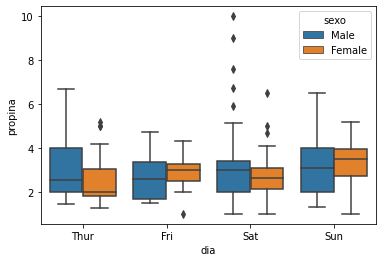

In [15]:
sns.boxplot(x='dia',y='propina',data=propinas,hue='sexo')

<AxesSubplot:xlabel='total', ylabel='propina'>

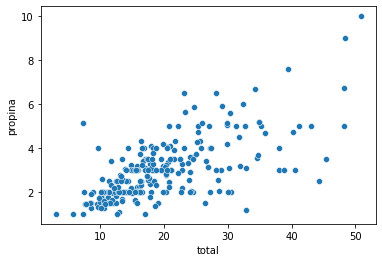

In [17]:
sns.scatterplot(x='total',y='propina',data=propinas)

C:\Users\panwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='propina', ylabel='Density'>

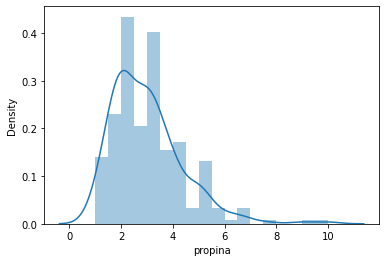

In [22]:
sns.distplot(propinas['propina'],hist=True)

<AxesSubplot:>

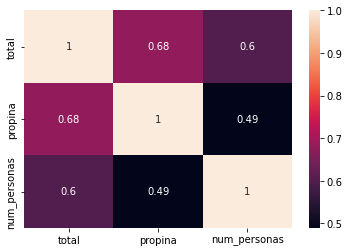

In [24]:
sns.heatmap(propinas.corr(),annot=True)

In [26]:
propinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   total         244 non-null    float64 
 1   propina       244 non-null    float64 
 2   sexo          244 non-null    category
 3   fumador       244 non-null    category
 4   dia           244 non-null    category
 5   turno         244 non-null    category
 6   num_personas  244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [27]:
# Columnas categoricas
categoricas = (propinas.dtypes == 'category')
categoricas

total           False
propina         False
sexo             True
fumador          True
dia              True
turno            True
num_personas    False
dtype: bool

In [30]:
# Dummies
import pandas as pd
datos_dummies = pd.get_dummies(propinas)
datos_dummies.columns


Index(['total', 'propina', 'num_personas', 'sexo_Male', 'sexo_Female',
       'fumador_Yes', 'fumador_No', 'dia_Thur', 'dia_Fri', 'dia_Sat',
       'dia_Sun', 'turno_Lunch', 'turno_Dinner'],
      dtype='object')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()
X = datos_dummies[['total', 'num_personas', 'sexo_Male', 'sexo_Female',
       'fumador_Yes', 'fumador_No', 'dia_Thur', 'dia_Fri', 'dia_Sat',
       'dia_Sun', 'turno_Lunch', 'turno_Dinner']]
y = datos_dummies['propina']


In [35]:
# division train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
# entrenamiento del modelo
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
# prediccion
prediccion = lm.predict(X_test)

In [38]:
# comparacion
resultado = {'Real':y_test,'Prediccion':prediccion}
resultado = pd.DataFrame(resultado)
resultado.head(10)

,Real,Prediccion
67,1.00,1.144107
243,3.00,2.399181
206,3.41,3.485860
122,2.50,2.438340
89,3.00,2.998877
218,1.44,1.714474
58,1.76,1.998804
186,3.50,3.047190
177,2.00,2.236508
4,3.61,3.738183


In [39]:
# evaluacion
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,prediccion)
MAE

0.7956578566938417

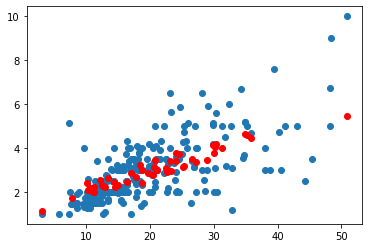

In [40]:
import matplotlib.pyplot as plt
propina = propinas['propina']
plt.scatter(propinas['total'],propina,label='Real')
plt.scatter(X_test['total'],prediccion,c='red',label='Prediccion')
plt.show()